## Cycle Benchmarking Example

In [ ]:
import pickle

from selene_sim import DepolarizingErrorModel, Stim
from selene_custom_error_model import (
    BasicErrorModel,
    OneQubitErrorRates,
    TwoQubitErrorRates,
)

from circuit_benchmarks_guppy.benchmarks import CB_Experiment

In [2]:
# select parameters and build experiment

qubits = [(0,1), (2,3), (4,5), (6,7), (8,9), (10,11), (12,13), (14,15)]
seq_lengths = [4, 60, 120]
filename = 'exp_CB_example.p'

exp = CB_Experiment(qubits, seq_lengths, filename=filename)
exp.add_settings()

In [ ]:
# or load existing experiment

filename = 'exp_CB_example.p'
exp = CB_Experiment.load(filename)

Having setup our cycle benchmarking experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [4]:
# setup simple error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    #p_1q=1e-3,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=1.5e-3,
    p_init=0,
)


In [3]:
# Or use hardware realistic error model

error_model = qsystem_model_alpha(random_seed=123)

C:\Users\karl.mayer\AppData\Local\anaconda3\envs\guppy_env\Lib\site-packages\pecos_selene\error_models\named.py:35: UserWarning: 


* The crosstalk channels are implemented using a very naive model.

* Leakage and memory error are implemented as in H1/H2, but it is expectedthese will change significantly in Helios.

* The noise parameter values are rough estimates, using a combination of target values for Helios and values from H2's model. These have not been verified by benchmarking experiments on the device.

* Anduril (the component that decides ion transport) does not currently report accurate timing estimates. This affects the memory error.

  warnings.warn(msg)


In [4]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/24 circuits complete
2/24 circuits complete
3/24 circuits complete
4/24 circuits complete
5/24 circuits complete
6/24 circuits complete
7/24 circuits complete
8/24 circuits complete
9/24 circuits complete
10/24 circuits complete
11/24 circuits complete
12/24 circuits complete
13/24 circuits complete
14/24 circuits complete
15/24 circuits complete
16/24 circuits complete
17/24 circuits complete
18/24 circuits complete
19/24 circuits complete
20/24 circuits complete
21/24 circuits complete
22/24 circuits complete
23/24 circuits complete
24/24 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [9]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

Enter your Nexus email:  karl.mayer@quantinuum.com
Enter your Nexus password:  ········


✅ Successfully logged in as karl.mayer@quantinuum.com.


In [10]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='CB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [11]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

Experiment saved! exp_CB_example.p


In [15]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<JobStatusEnum.COMPLETED: 'COMPLETED'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 8, 28, 18, 45, 53, 679472, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 8, 28, 18, 41, 28, 874032, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=None, queue_position=None)

In [16]:
# retrieve results

exp.retrieve(execute_job_ref)

Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider 

Experiment saved! exp_CB_example.p


### Analyze experiment results

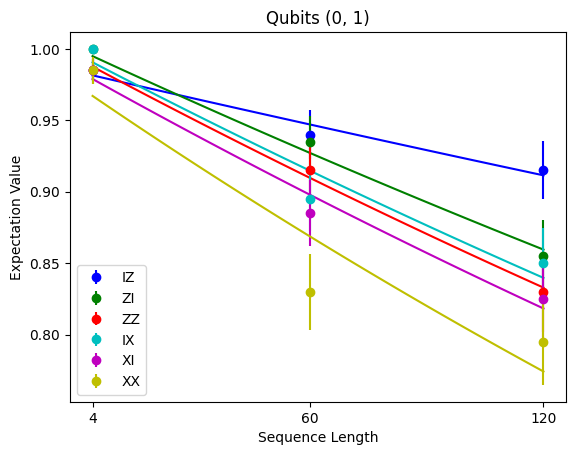

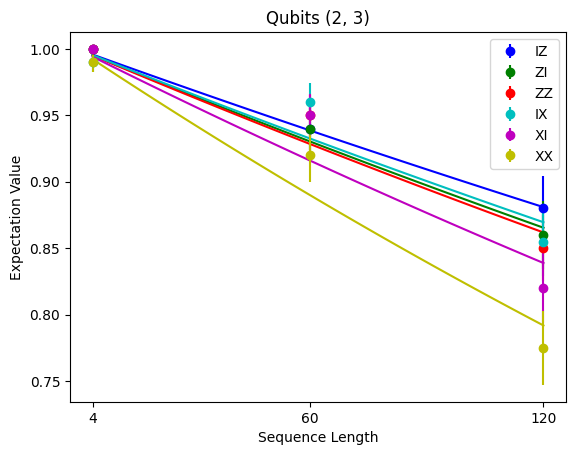

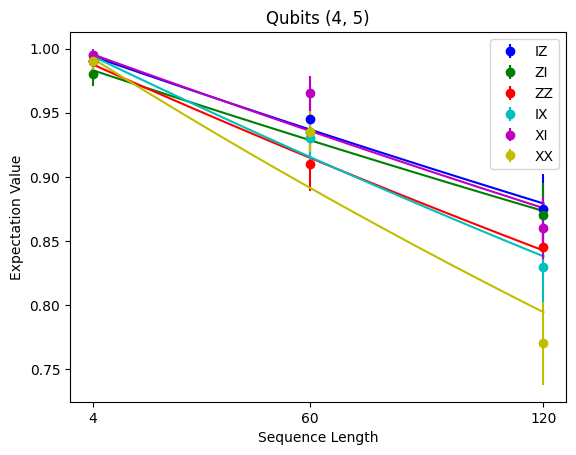

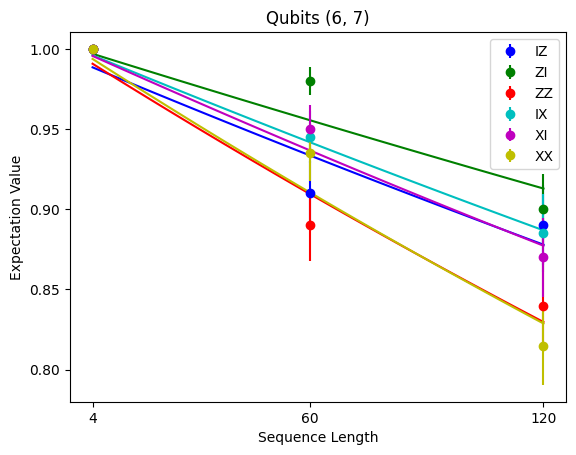

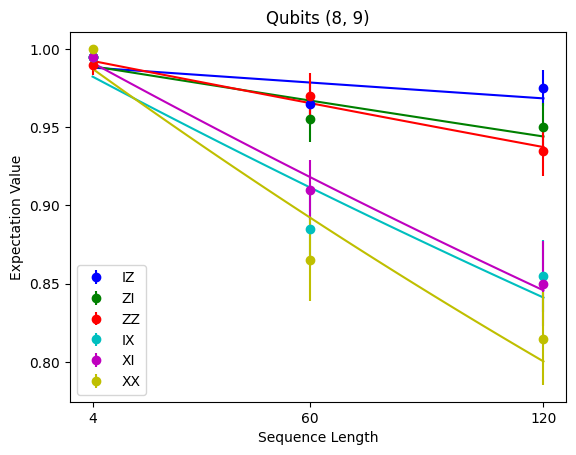

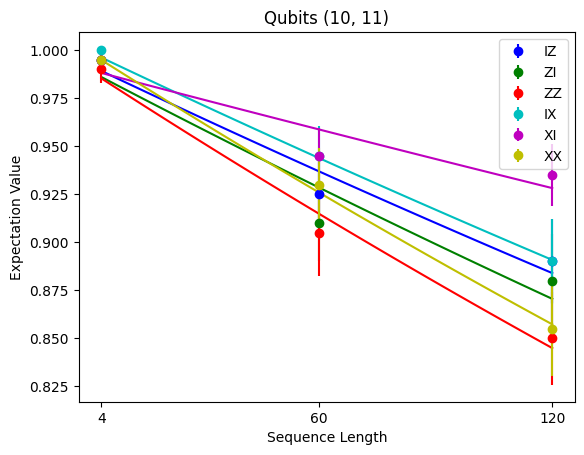

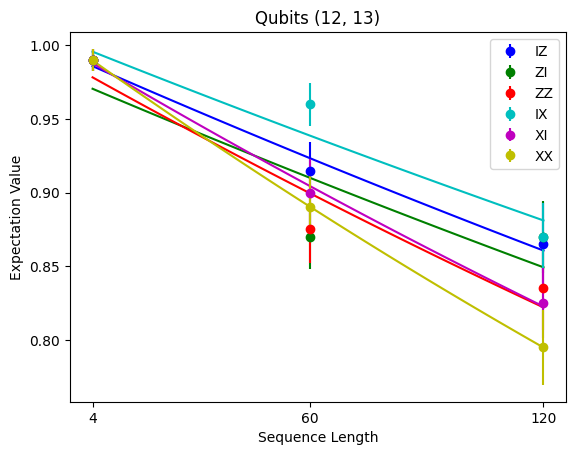

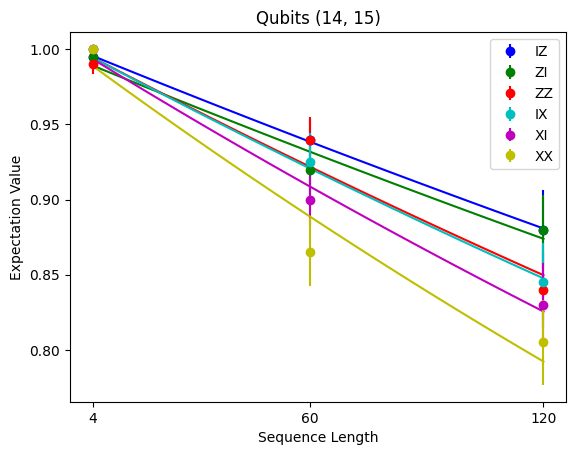

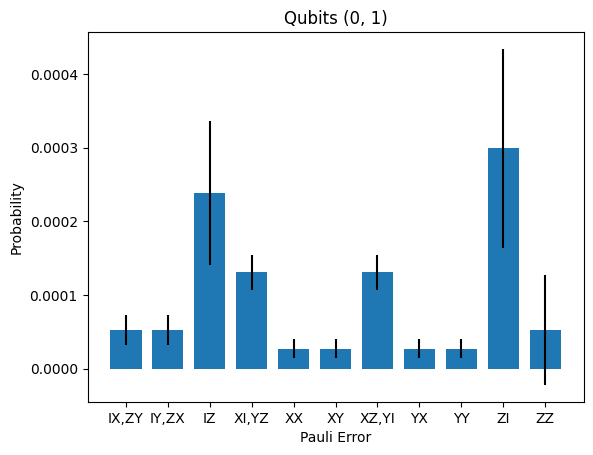

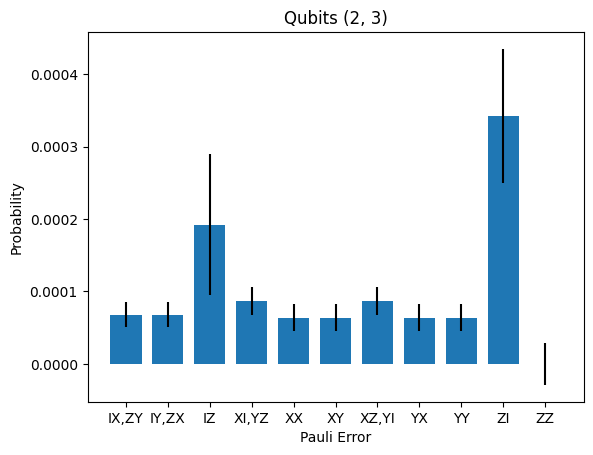

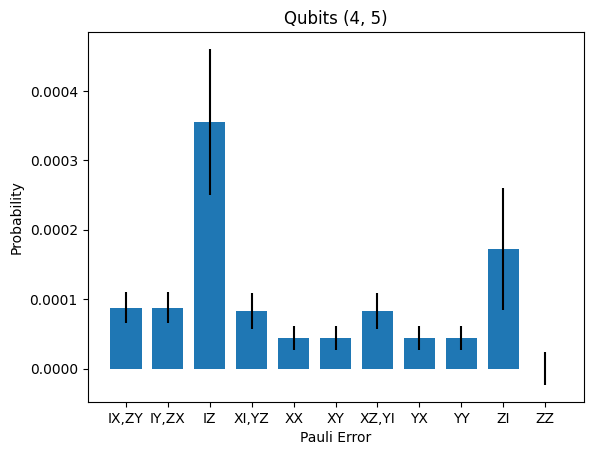

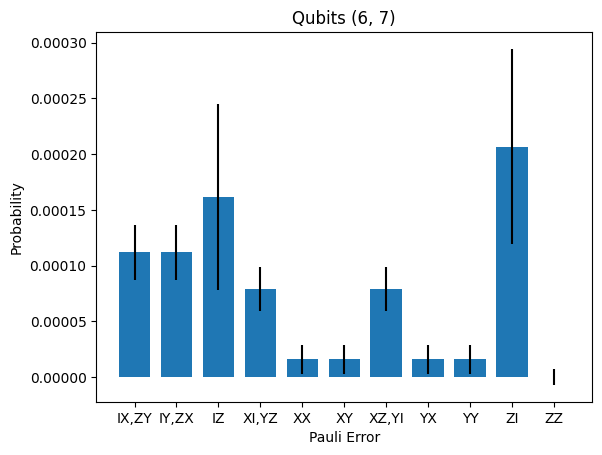

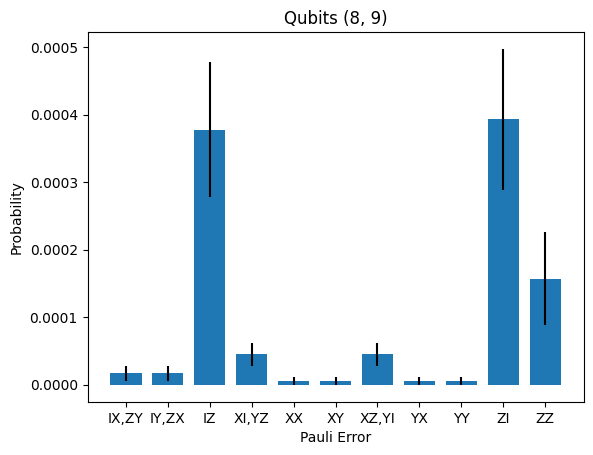

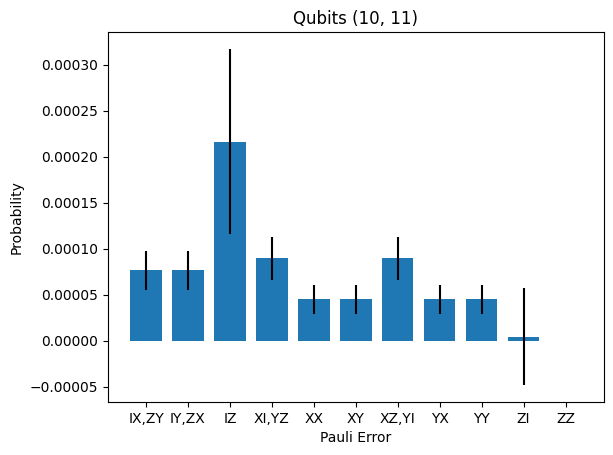

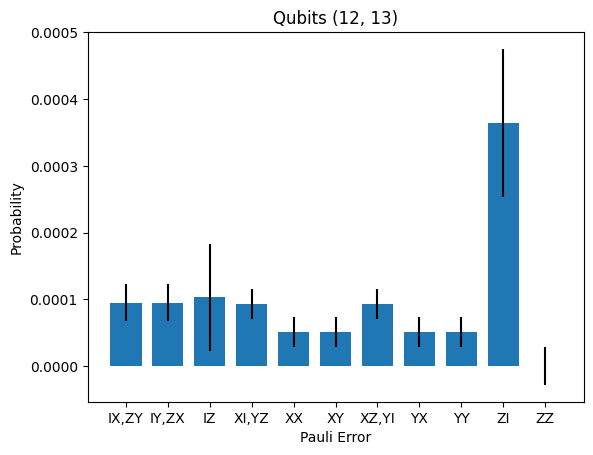

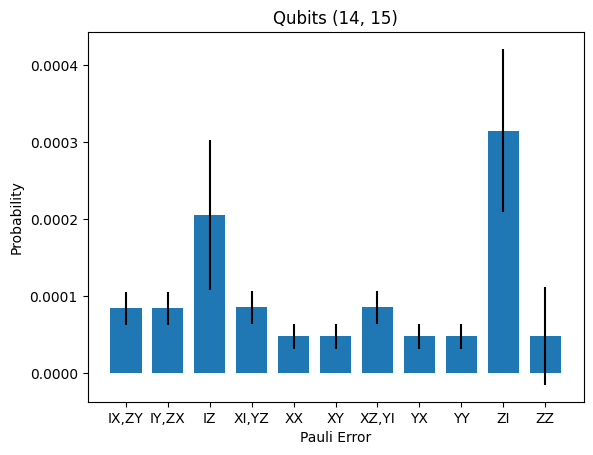

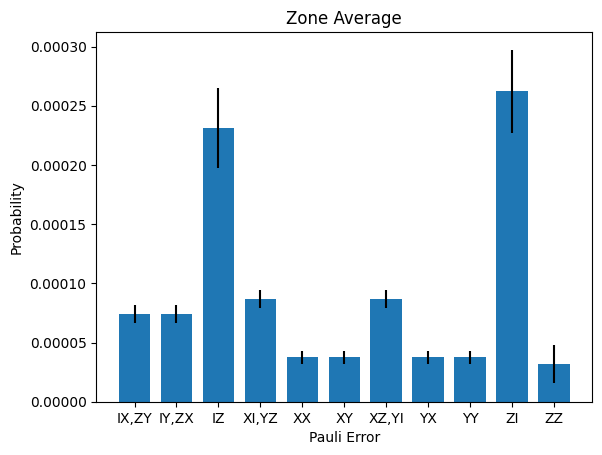

Average Infidelity
--------------------------
(0, 1): 0.00115 +/- 0.00014
(2, 3): 0.00113 +/- 0.00012
(4, 5): 0.00111 +/- 0.00013
(6, 7): 0.00096 +/- 0.0001
(8, 9): 0.00096 +/- 0.00013
(10, 11): 0.00085 +/- 9e-05
(12, 13): 0.00114 +/- 0.00011
(14, 15): 0.00115 +/- 0.00012

Zone Average:
0.00105 +/- 4e-05


In [5]:
exp.analyze_results()

In [6]:
# print estimated Pauli errors

P_probs = exp.mean_Pauli_probs
P_stds = exp.mean_Pauli_stds

for P in P_probs:
    print(f'{P}: {round(P_probs[P], 6)} +/- {round(P_stds[P], 6)}')

IX: 7.4e-05 +/- 7e-06
IY: 7.4e-05 +/- 7e-06
IZ: 0.000231 +/- 3.4e-05
XI: 8.6e-05 +/- 8e-06
XX: 3.8e-05 +/- 6e-06
XY: 3.8e-05 +/- 6e-06
XZ: 8.6e-05 +/- 8e-06
YI: 8.6e-05 +/- 8e-06
YX: 3.8e-05 +/- 6e-06
YY: 3.8e-05 +/- 6e-06
YZ: 8.6e-05 +/- 8e-06
ZI: 0.000262 +/- 3.5e-05
ZX: 7.4e-05 +/- 7e-06
ZY: 7.4e-05 +/- 7e-06
ZZ: 3.2e-05 +/- 1.6e-05


In [ ]:
# save experiment object to working directory

exp.save()